# Accessing the Computation Toolbox from the Pandas API

You can access the capacities of `et` directly from a pandas object by adding the following import:

In [1]:
import energy_toolbox.pandas

# On a Series
Considering any timeseries, the computation toolbox can be used for any useful processing.

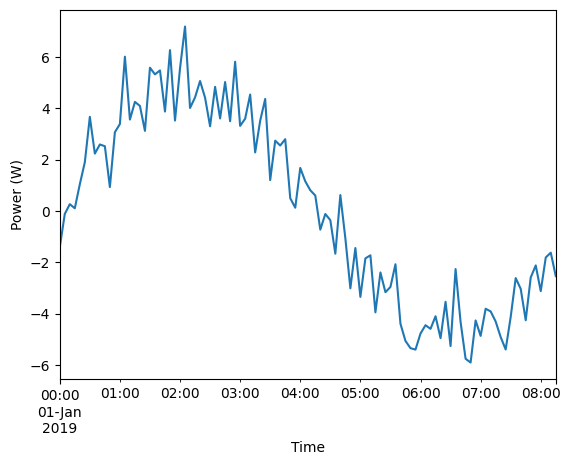

In [8]:
import pandas as pd
import numpy as np
n_elements = 100
power_series = pd.Series(
    data = 5*np.sin(np.linspace(0, 6, n_elements)) + np.random.randn(n_elements),
    index = pd.date_range(
        start = '2019-01-01',
        periods = n_elements,
        freq = '5min',
    )
)
ax = power_series.plot()
ax.set_ylabel('Power (W)')
ax.set_xlabel('Time');

## Transforming the power to energy

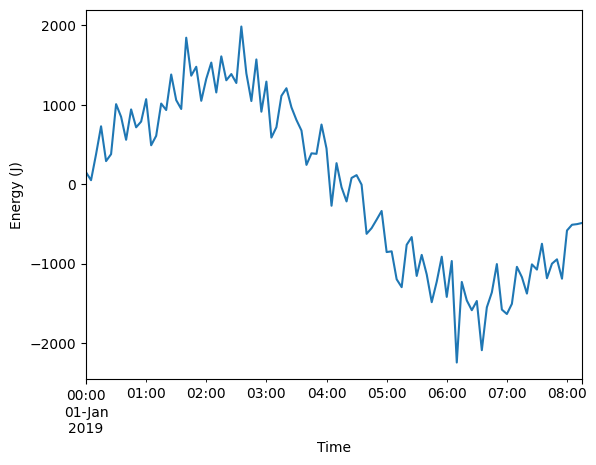

In [3]:
ax =power_series.et.to_energy().plot()
ax.set_ylabel('Energy (J)')
ax.set_xlabel('Time');

## Resampling to a fixed frequency

For power and energy, a specific accessor using the right interpolation method exists.

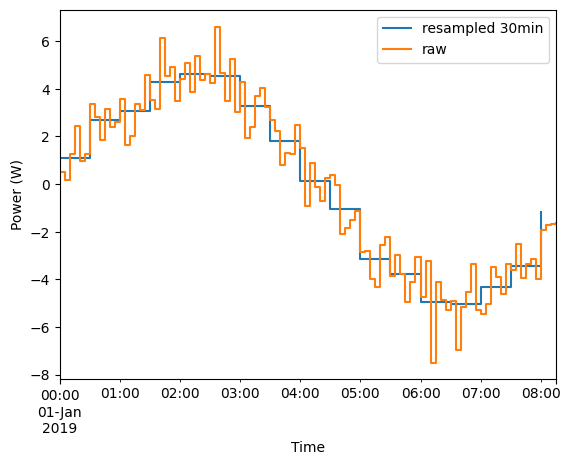

In [4]:
ax = power_series.et.power_to_freq(freq='30min').plot(drawstyle='steps-post')
power_series.plot(
    ax=ax,
    drawstyle='steps-post',
)
ax.set_ylabel('Power (W)')
ax.set_xlabel('Time')
ax.legend(['resampled 30min', 'raw']);

A more generic timeseries resampling is also available wich let you choose the method :

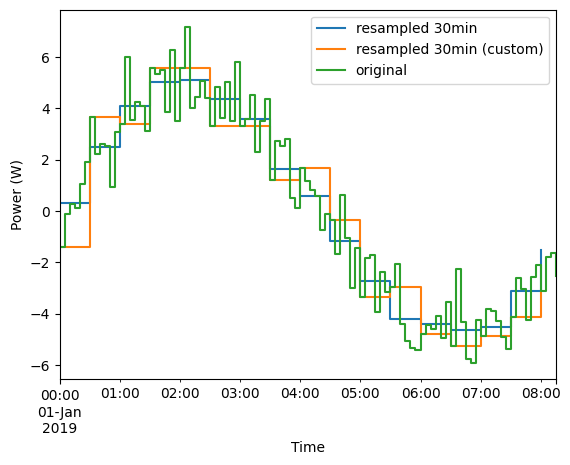

In [9]:
ax = power_series.et.power_to_freq(freq='30min').plot(
    drawstyle='steps-post',
    label='resampled 30min',
    legend=True,
)
power_series.et.to_freq(
    freq='30min',
    method='flow_rate_conservative',
).plot(
    drawstyle='steps-post',
    label='resampled 30min (custom)',
    legend=True,
    ax=ax,
)
power_series.plot(
    ax=ax,
    drawstyle='steps-post',
    legend='True',
    label='original',
)
ax.set_ylabel('Power (W)')
ax.set_xlabel('Time');

## Detective interval with power over a threshold


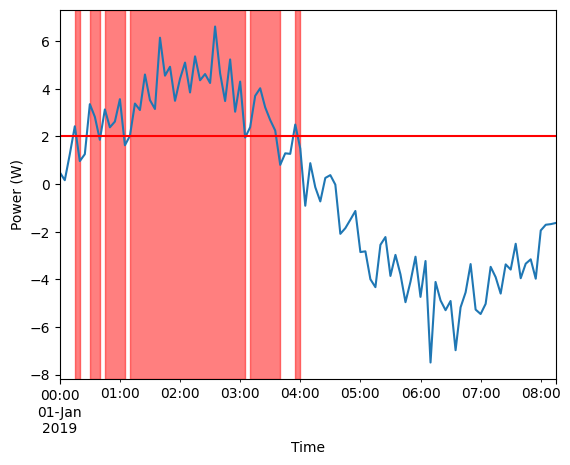

In [6]:
threshold=2
oversonsumptions = power_series.et.intervals_over(threshold)

ax = power_series.plot()
ax.axhline(threshold, color='red')
for idx, (start, end) in oversonsumptions.iterrows():
    ax.axvspan(start, end, color='red', alpha=0.5)

ax.set_ylabel('Power (W)')
ax.set_xlabel('Time');

## Filling data holes

A missing entry is cumbersome for a Series, as there is no "duration" associated with a value.

You can use `et` to fill the data holes. The Example bellow shows how to fill the data hole to `0`.

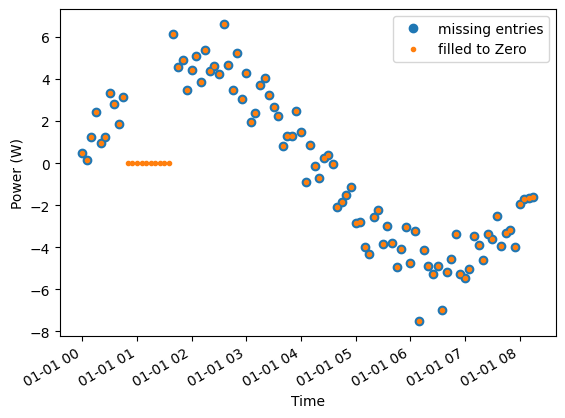

In [7]:
missing_data_series = power_series.drop( power_series.index[10:20] )
ax = missing_data_series.plot(marker='o', linestyle='none')

filled_series = missing_data_series.et.fill_data_holes(fill_value=0)
ax = filled_series.plot(ax=ax, marker=".", linestyle='none')
ax.set_ylabel('Power (W)')
ax.set_xlabel('Time')
ax.legend(['missing entries', 'filled to Zero']);